# Trending Searches

A notebook for data visualization.

In [1]:
import os
abspath = os.path.abspath('.')
dname = os.path.abspath(os.path.join(abspath, os.pardir))
os.chdir(dname)

In [2]:
import yaml
from search_loader import SearchLoader
from preprocessor import Preprocessor
from trend_detector import TrendDetector

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
%matplotlib inline

In [3]:
with open("config/config.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)

In [4]:
sl = SearchLoader(cfg)
df = sl.load()

In [5]:
pp = Preprocessor(df)
agg_df = pp.run()

In [6]:
td = TrendDetector(cfg)
td.build(agg_df)

Model successfully built.


In [7]:
queries = agg_df['query'].unique()
queries

array(['bitcoin', 're', 'ho', 'python', 'p', 'li', 'elixir', 'lua', 'd',
       'netflix', 'youtube', 'c', 'clojure', 'sa', 's', 'react', 'pr',
       'kotlin', 'wework', 'emacs', 'smalltalk', 'g', 'de', 'm',
       'javascript', 'japan', 'tesla', 'ap', 'node', 'apple', 'dropbox',
       'china', 'ma', 'sc', 'intel', 'graphql', 'v', 'fastmail', 'lisp',
       'e', 'st', 'ocaml', 'scala', 'vim', 'r', '1password', 'o',
       'depression', 'openbsd', 'hiring', 'i', 'mo', 'checklist', 'video',
       'da', 't', 'react native', 'a', 'postgresql', 'bitwarden', 'co',
       'le', 'postgrest', 'kubernetes', 'an', 'machine learning', 'py',
       'gdpr', 'julia', 'palantir', 'ca', 'java', 'who s hiring', 'f',
       'oracle', 'vi', 'vue', 'l', 'ask hn', 'google', 'perl', 'docker',
       'ne', 'rust', 'resume', 'b', 'h', 'te', 'world cup', 'dart',
       'microsoft', 'freebsd', 'postgres', 'mongodb', 'who is hiring',
       'blockchain', 'ethereum', 'ha', 'django', 'th', 'mbasic facebook',
   

In [8]:
def plot_daily_search(query, dates, counts):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(counts)), counts, 'o-', label=query)
    plt.plot(len(counts) - 1, counts[-1], 'or')
    plt.xticks(range(len(dates)), dates, rotation=90)
    plt.title('Qeury Daily Search Count')
    plt.legend()
    plt.show()

Query: [bitcoin](0.429985) is not a trending search for the given observation.


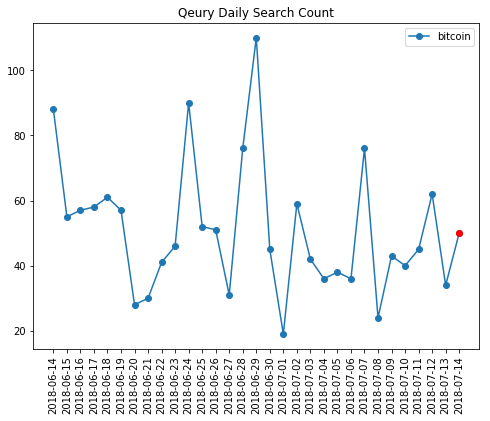

In [9]:
query = 'bitcoin'

history_df = agg_df[agg_df['query'] == query][['date', 'count']]
counts = history_df['count'].values
trending = td.is_trending(query, counts[-1], verbose=True)

plot_daily_search(query, history_df['date'], counts)

Query: [bitcoin](3.381475) is a trending search for the given observation.


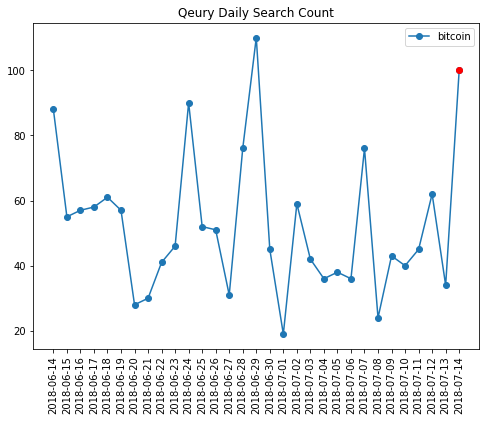

In [10]:
query = 'bitcoin'

history_df = agg_df[agg_df['query'] == query][['date', 'count']]
counts = history_df['count'].values
counts[-1] = 100
trending = td.is_trending(query, counts[-1], verbose=True)

plot_daily_search(query, history_df['date'], counts)